# Credit Card Fraud Detection

#### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

#### Loading the dataset to a pandas dataframe

In [6]:
df = pd.read_csv(r"C:\Users\ayanm\Desktop\Data for ML\Synthetic Financial Data.csv")

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Dataset Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.shape

(6362620, 11)

In [11]:
df.groupby('isFlaggedFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,,,,
0,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604
1,16,16,16,16,16,16,16,16,16,16


In [12]:
df.pivot_table(values = 'amount',index = 'type',columns = 'isFraud',aggfunc = 'count')

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [13]:
df_filtered = df[df.type.isin(['CASH_OUT','TRANSFER'])]

#### LabelEncoding the type column

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
df_filtered['typeEncoded'] = encoder.fit_transform(df_filtered['type'])
df_filtered.pivot_table(values = 'amount',index = 'typeEncoded',columns = 'isFraud',aggfunc = 'count')

isFraud,0,1
typeEncoded,,
0,2233384,4116
1,528812,4097


In [18]:
df_filtered.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeEncoded
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


#### Dropping unnecessary columns

In [20]:
df2 = df_filtered.drop(['step','type','nameOrig','nameDest','isFlaggedFraud'],axis = 1)

In [21]:
df2.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


#### Distribution of legit and fraudulent transaction

In [23]:
legit = df2[df2.isFraud == 0]
legit.shape

(2762196, 7)

In [24]:
fraud = df2[df2.isFraud == 1]
fraud.shape

(8213, 7)

#### Under-Sampling : Build a sample dataset containing similar distribution of Legit and Fraudulent transactions

In [26]:
legit_sample = legit.sample (n = 8213)

In [27]:
legit_sample.shape

(8213, 7)

In [28]:
legit.amount.describe()

count    2.762196e+06
mean     3.141155e+05
std      8.771441e+05
min      1.000000e-02
25%      8.290823e+04
50%      1.710345e+05
75%      3.059942e+05
max      9.244552e+07
Name: amount, dtype: float64

In [29]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

#### Concatinating two dataframe

In [31]:
new_df = pd.concat ([legit_sample, fraud], axis = 0)

In [32]:
new_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
3071715,58110.13,23625.0,0.00,215740.56,273850.69,0,0
3455265,17948.50,161370.0,143421.50,96300.76,114249.26,0,0
4208320,265277.47,126104.0,0.00,0.00,265277.47,0,0
6054759,120659.40,0.0,0.00,2876612.13,2997271.52,0,0
3014225,35079.53,38451.0,3371.47,0.00,35079.53,0,0


In [33]:
new_df.isFraud.value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

#### Splitting the data into features and targets

In [35]:
X = new_df.drop(['isFraud'], axis = 1)
y = new_df.isFraud

#### Spilting the data into training and testing

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = False)

#### Model training
#### Logistic Regression : Binary Classification

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [41]:
lr.score(X_test, y_test)

0.8998782714546562

In [42]:
y_pred = lr.predict(X_test)

In [43]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[1524,  106],
       [ 223, 1433]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

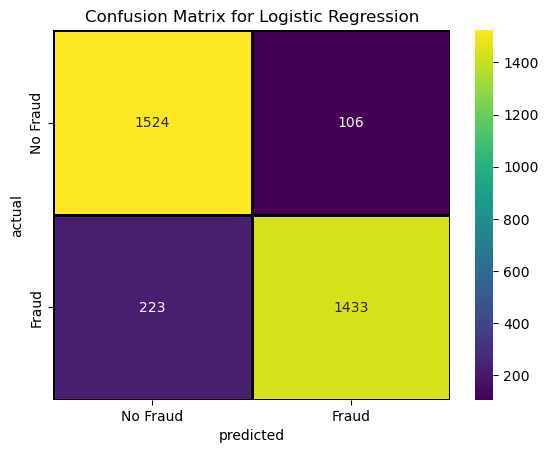

In [44]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'viridis', linewidths = 1, linecolor = 'Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix for Logistic Regression')

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1630
           1       0.93      0.87      0.90      1656

    accuracy                           0.90      3286
   macro avg       0.90      0.90      0.90      3286
weighted avg       0.90      0.90      0.90      3286



#### Model with DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
d_predicted = dt.predict(X_test)

In [50]:
dt.score(X_test, y_test)

0.9905660377358491

In [51]:
cm = confusion_matrix (y_test, d_predicted)
cm

array([[1613,   17],
       [  14, 1642]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

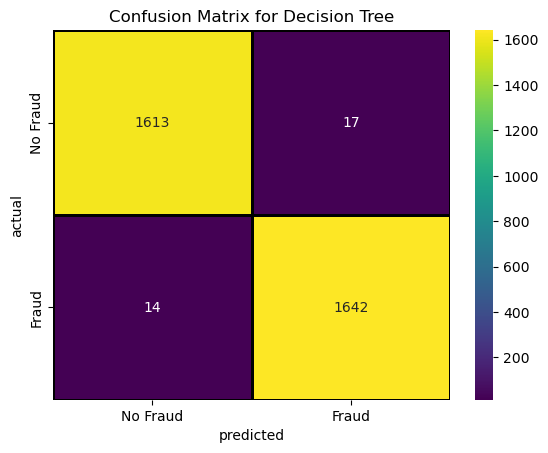

In [52]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'viridis', linewidths = 1, linecolor = 'Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix for Decision Tree')

In [53]:
print(classification_report(y_test, d_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



#### Gradient Boosting and Random Forest Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [56]:
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
rf.score(X_test, y_test)

0.9887401095556908

In [59]:
rf_predicted = rf.predict(X_test)

In [60]:
cm = confusion_matrix (y_test, rf_predicted)
cm

array([[1605,   25],
       [  12, 1644]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

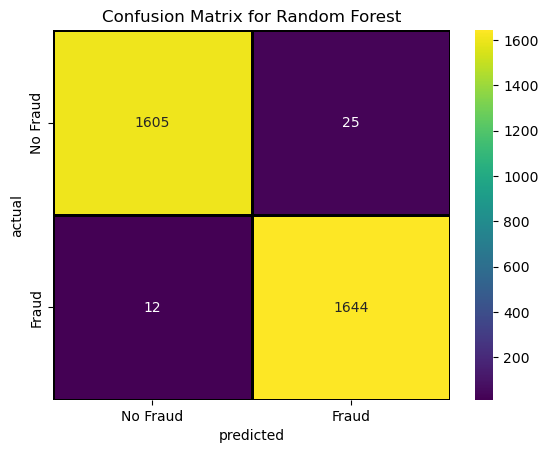

In [61]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'viridis', linewidths = 1, linecolor = 'Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix for Random Forest')

In [62]:
print(classification_report(y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [63]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [64]:
gb.score(X_test, y_test)

0.9814363968350578

In [65]:
gb_predicted = gb.predict(X_test)

In [66]:
cm = confusion_matrix (y_test, gb_predicted)
cm

array([[1576,   54],
       [   7, 1649]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting')

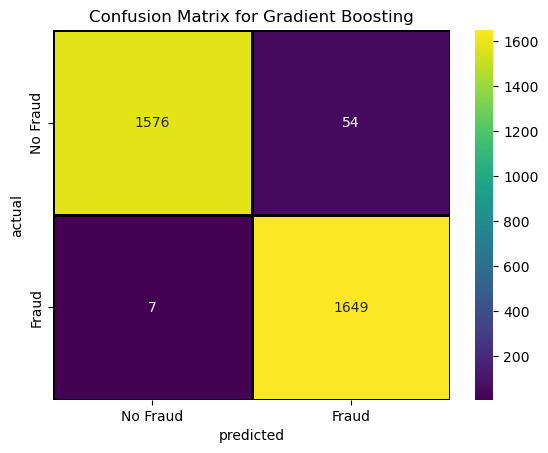

In [67]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'viridis', linewidths = 1, linecolor = 'Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix for Gradient Boosting')

In [68]:
print(classification_report(y_test, gb_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1630
           1       0.97      1.00      0.98      1656

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286



## Conclusion : 

### We can see Random Forest Classifier and Decision Tree Classifier performs better than the Logistic Regression and Gradient Boosting Classifier. Though the accuracy score of both are similar, but if we watch keenly Random Forest algorithm has detected more Fraudulent transactions than Decision Tree. Even if we see the confusion matrix the "No Fraud" prediction when it is actually "Fraud" is lower than Decision Tree. 